In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)
# Data Loading, Cleaning, and Transformation.

In [ ]:
df = pd.read_csv(r"Telco-Customer-Churn.csv")
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [150]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [151]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
df.drop(columns=['customerID'], inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [154]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [155]:
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


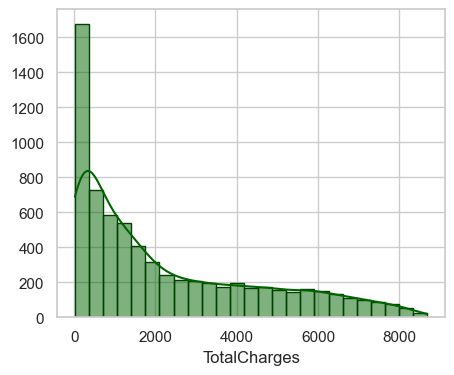

In [156]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.histplot(df['TotalCharges'], kde=True, color='#006400', edgecolor='#004000', ax=ax)
ax.set_ylabel('')
plt.show()

In [157]:
new_customers_df = df[df['tenure'] == 0]
num_rows_with_tenure_zero = new_customers_df.shape[0]

In [158]:
print(f"Number of rows where Tenure is 0: {num_rows_with_tenure_zero}")

Number of rows where Tenure is 0: 11


In [159]:
print(new_customers_df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']].head(11))
num_rows_with_tenure_zero = new_customers_df.shape[0]

      tenure  MonthlyCharges  TotalCharges Churn
488        0           52.55           NaN    No
753        0           20.25           NaN    No
936        0           80.85           NaN    No
1082       0           25.75           NaN    No
1340       0           56.05           NaN    No
3331       0           19.85           NaN    No
3826       0           25.35           NaN    No
4380       0           20.00           NaN    No
5218       0           19.70           NaN    No
6670       0           73.35           NaN    No
6754       0           61.90           NaN    No


In [160]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0  
new_customers_df = df[df['tenure'] == 0]

print(new_customers_df[['tenure','MonthlyCharges', 'TotalCharges', 'Churn']].head(11))
num_rows_with_tenure_zero = new_customers_df.shape[0]

print(f"Number of rows where Tenure is 0: {num_rows_with_tenure_zero}")

      tenure  MonthlyCharges  TotalCharges Churn
488        0           52.55           0.0    No
753        0           20.25           0.0    No
936        0           80.85           0.0    No
1082       0           25.75           0.0    No
1340       0           56.05           0.0    No
3331       0           19.85           0.0    No
3826       0           25.35           0.0    No
4380       0           20.00           0.0    No
5218       0           19.70           0.0    No
6670       0           73.35           0.0    No
6754       0           61.90           0.0    No
Number of rows where Tenure is 0: 11


# Descriptive Statistics & Numerical Features Visualization.


In [161]:
summary = df.drop(columns=['SeniorCitizen']).describe().T 
summary.style.background_gradient(cmap='Blues').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.00,2279.73,2266.79,0.00,398.55,1394.55,3786.60,8684.80


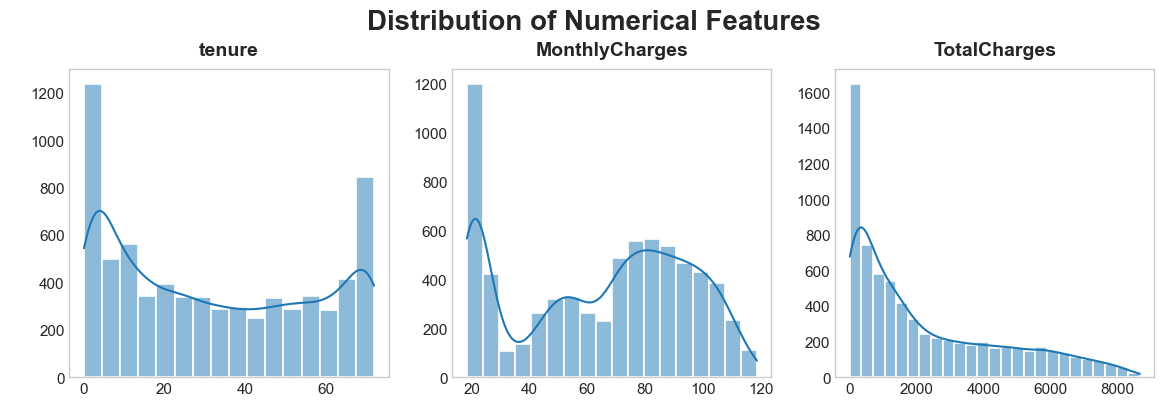

In [162]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Blues_d')

n_cols = 3
n_rows = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4))
fig.suptitle('Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.03)
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(
        data=df, 
        x=col, 
        kde=True, 
        color='#1f77b4', 
        edgecolor='white',
        linewidth=1.2,
        ax=axes[i]
    )
    axes[i].set_title(f'{col}', fontsize=14, fontweight='semibold', pad=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(' ', fontsize=12)
    axes[i].grid(alpha=0.0)


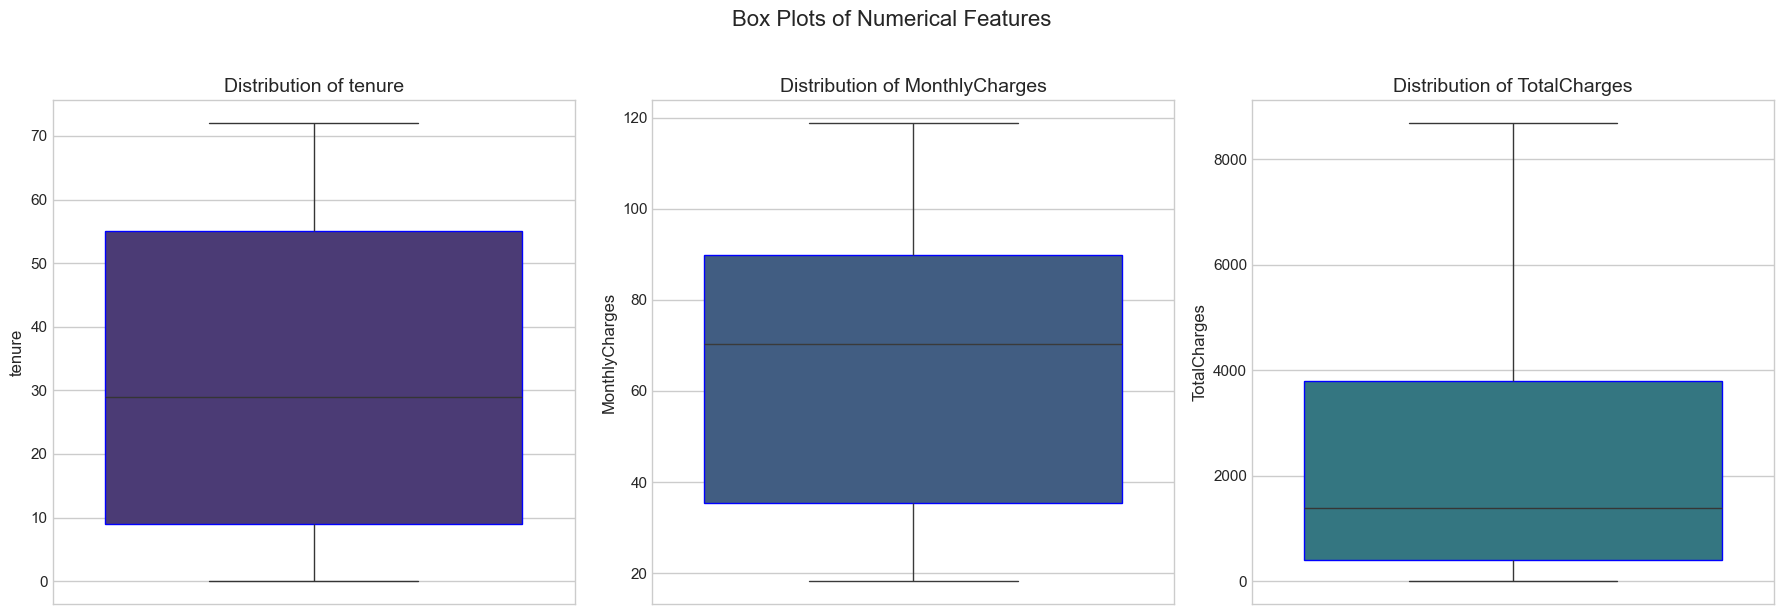

In [163]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
 
    sns.boxplot(y=df[col], color=sns.color_palette('viridis')[i], boxprops={'edgecolor': 'blue'})
    plt.title(f'Distribution of {col}', fontsize=14) 
    plt.ylabel(col, fontsize=12)

plt.suptitle('Box Plots of Numerical Features', y=1.02, fontsize=16)

plt.tight_layout() 
plt.show()

# Numerical  Variables Visualization: Bivariate Analysis.

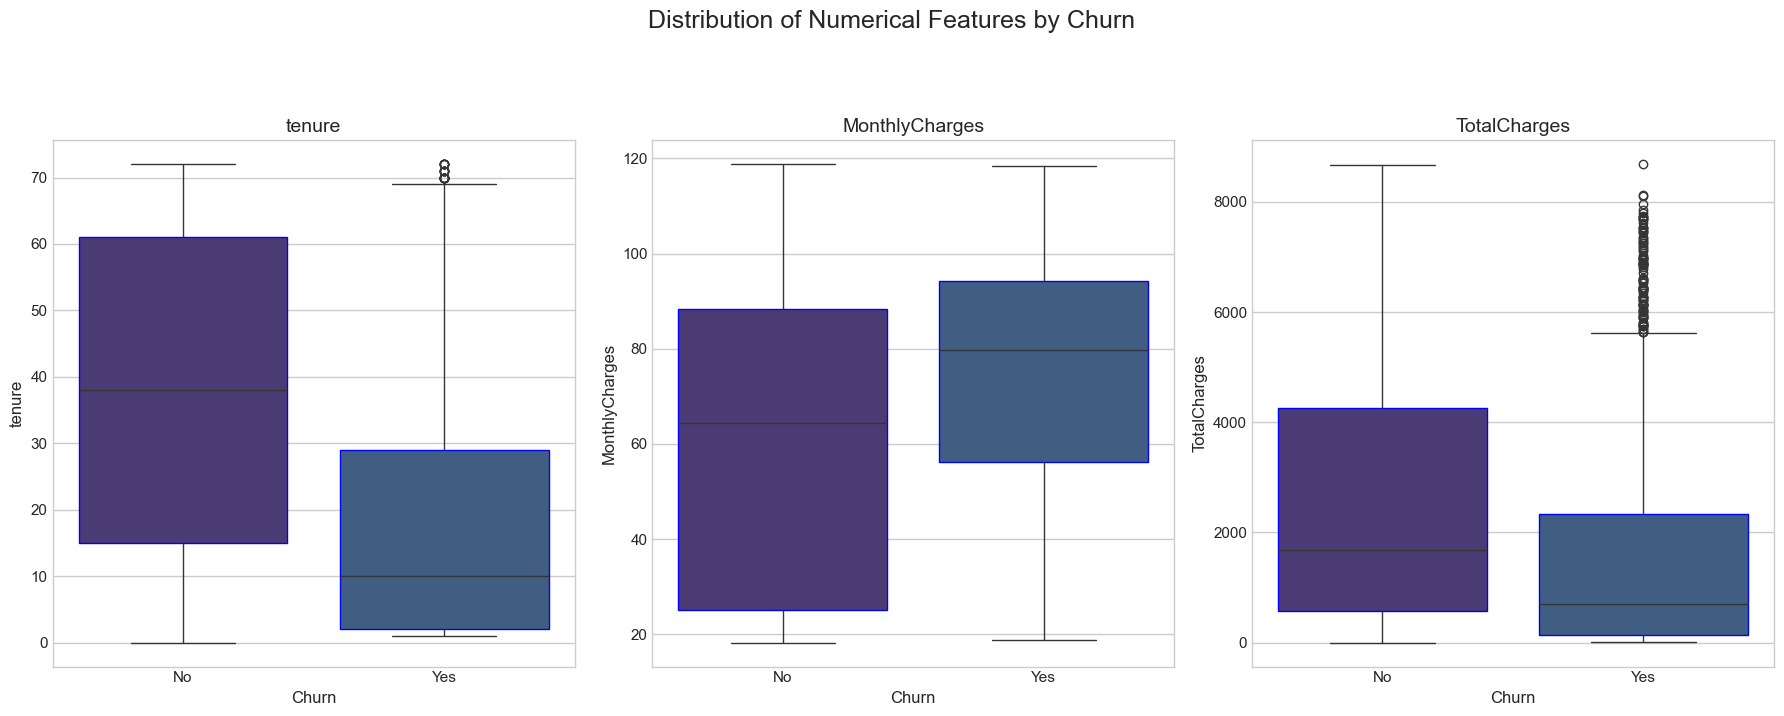

In [164]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
target_variable = 'Churn' 

plt.style.use('seaborn-v0_8-whitegrid') 
palette = sns.color_palette("viridis") 
plt.figure(figsize=(18, 7)) 
plt.suptitle(f'Distribution of Numerical Features by {target_variable}', y=1.02, fontsize=18)

for i, col in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=target_variable, y=df[col], data=df, palette=palette,  boxprops={'edgecolor': 'blue'}) 
    plt.title(f'{col}', fontsize=14) 
    plt.xlabel(target_variable, fontsize=12) 
    plt.ylabel(col, fontsize=12) 

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

# Numerical Features Relationships. 

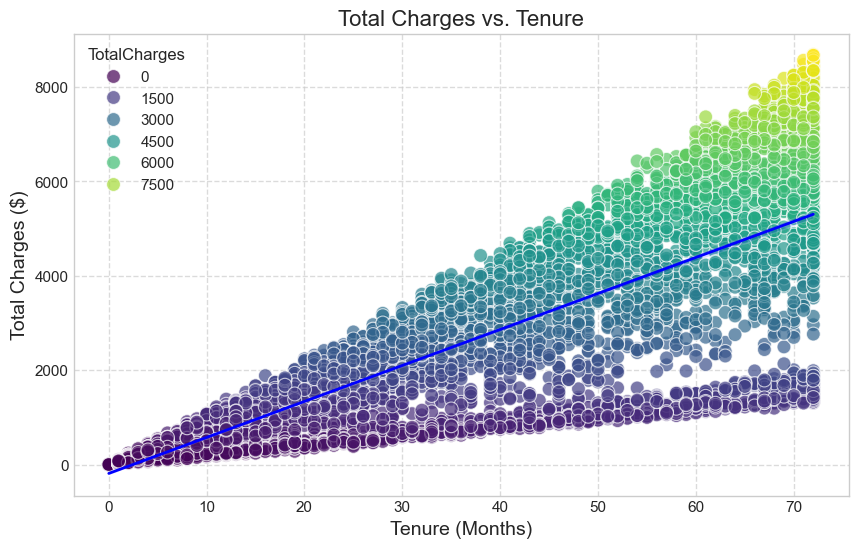

In [165]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='TotalCharges', palette='viridis', alpha=0.7, s=100)

sns.regplot(data=df, x='tenure', y='TotalCharges', scatter=False, color='blue', line_kws={"linewidth": 2})

plt.title('Total Charges vs. Tenure', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=14)
plt.ylabel('Total Charges ($)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

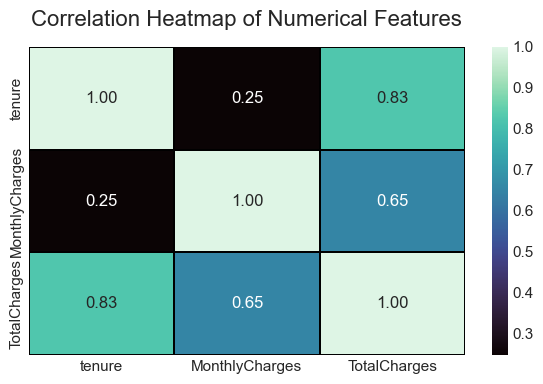

In [166]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

correlation_matrix = df[numerical_cols].corr()
plt.style.use('seaborn-v0_8-whitegrid') 
plt.figure(figsize=(6, 4)) 

sns.heatmap(
    correlation_matrix,
    annot=True,         
    cmap='mako',     
    fmt=".2f",          
    linewidths=.1,     
    linecolor='black',
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16, pad=15) 

plt.tight_layout()
plt.show()

# Categorical Variables Visualization: Univariate Analysis.

In [167]:
print(df['Churn'].value_counts(normalize=True))
print(df['Churn'].value_counts())

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
Churn
No     5174
Yes    1869
Name: count, dtype: int64


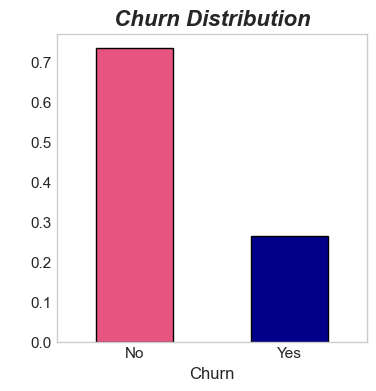

In [168]:
plt.style.use('seaborn-v0_8-whitegrid') 

plt.figure(figsize=(4,4))
df['Churn'].value_counts(normalize=True).plot(kind='bar', color=['#E75480','darkblue'], edgecolor="black")
plt.title("Churn Distribution", fontsize=16, fontstyle='oblique', fontweight='bold')  # 'normal', 'italic', 'oblique'
plt.ylabel(" ")
plt.xticks(rotation=0)
plt.grid(False)


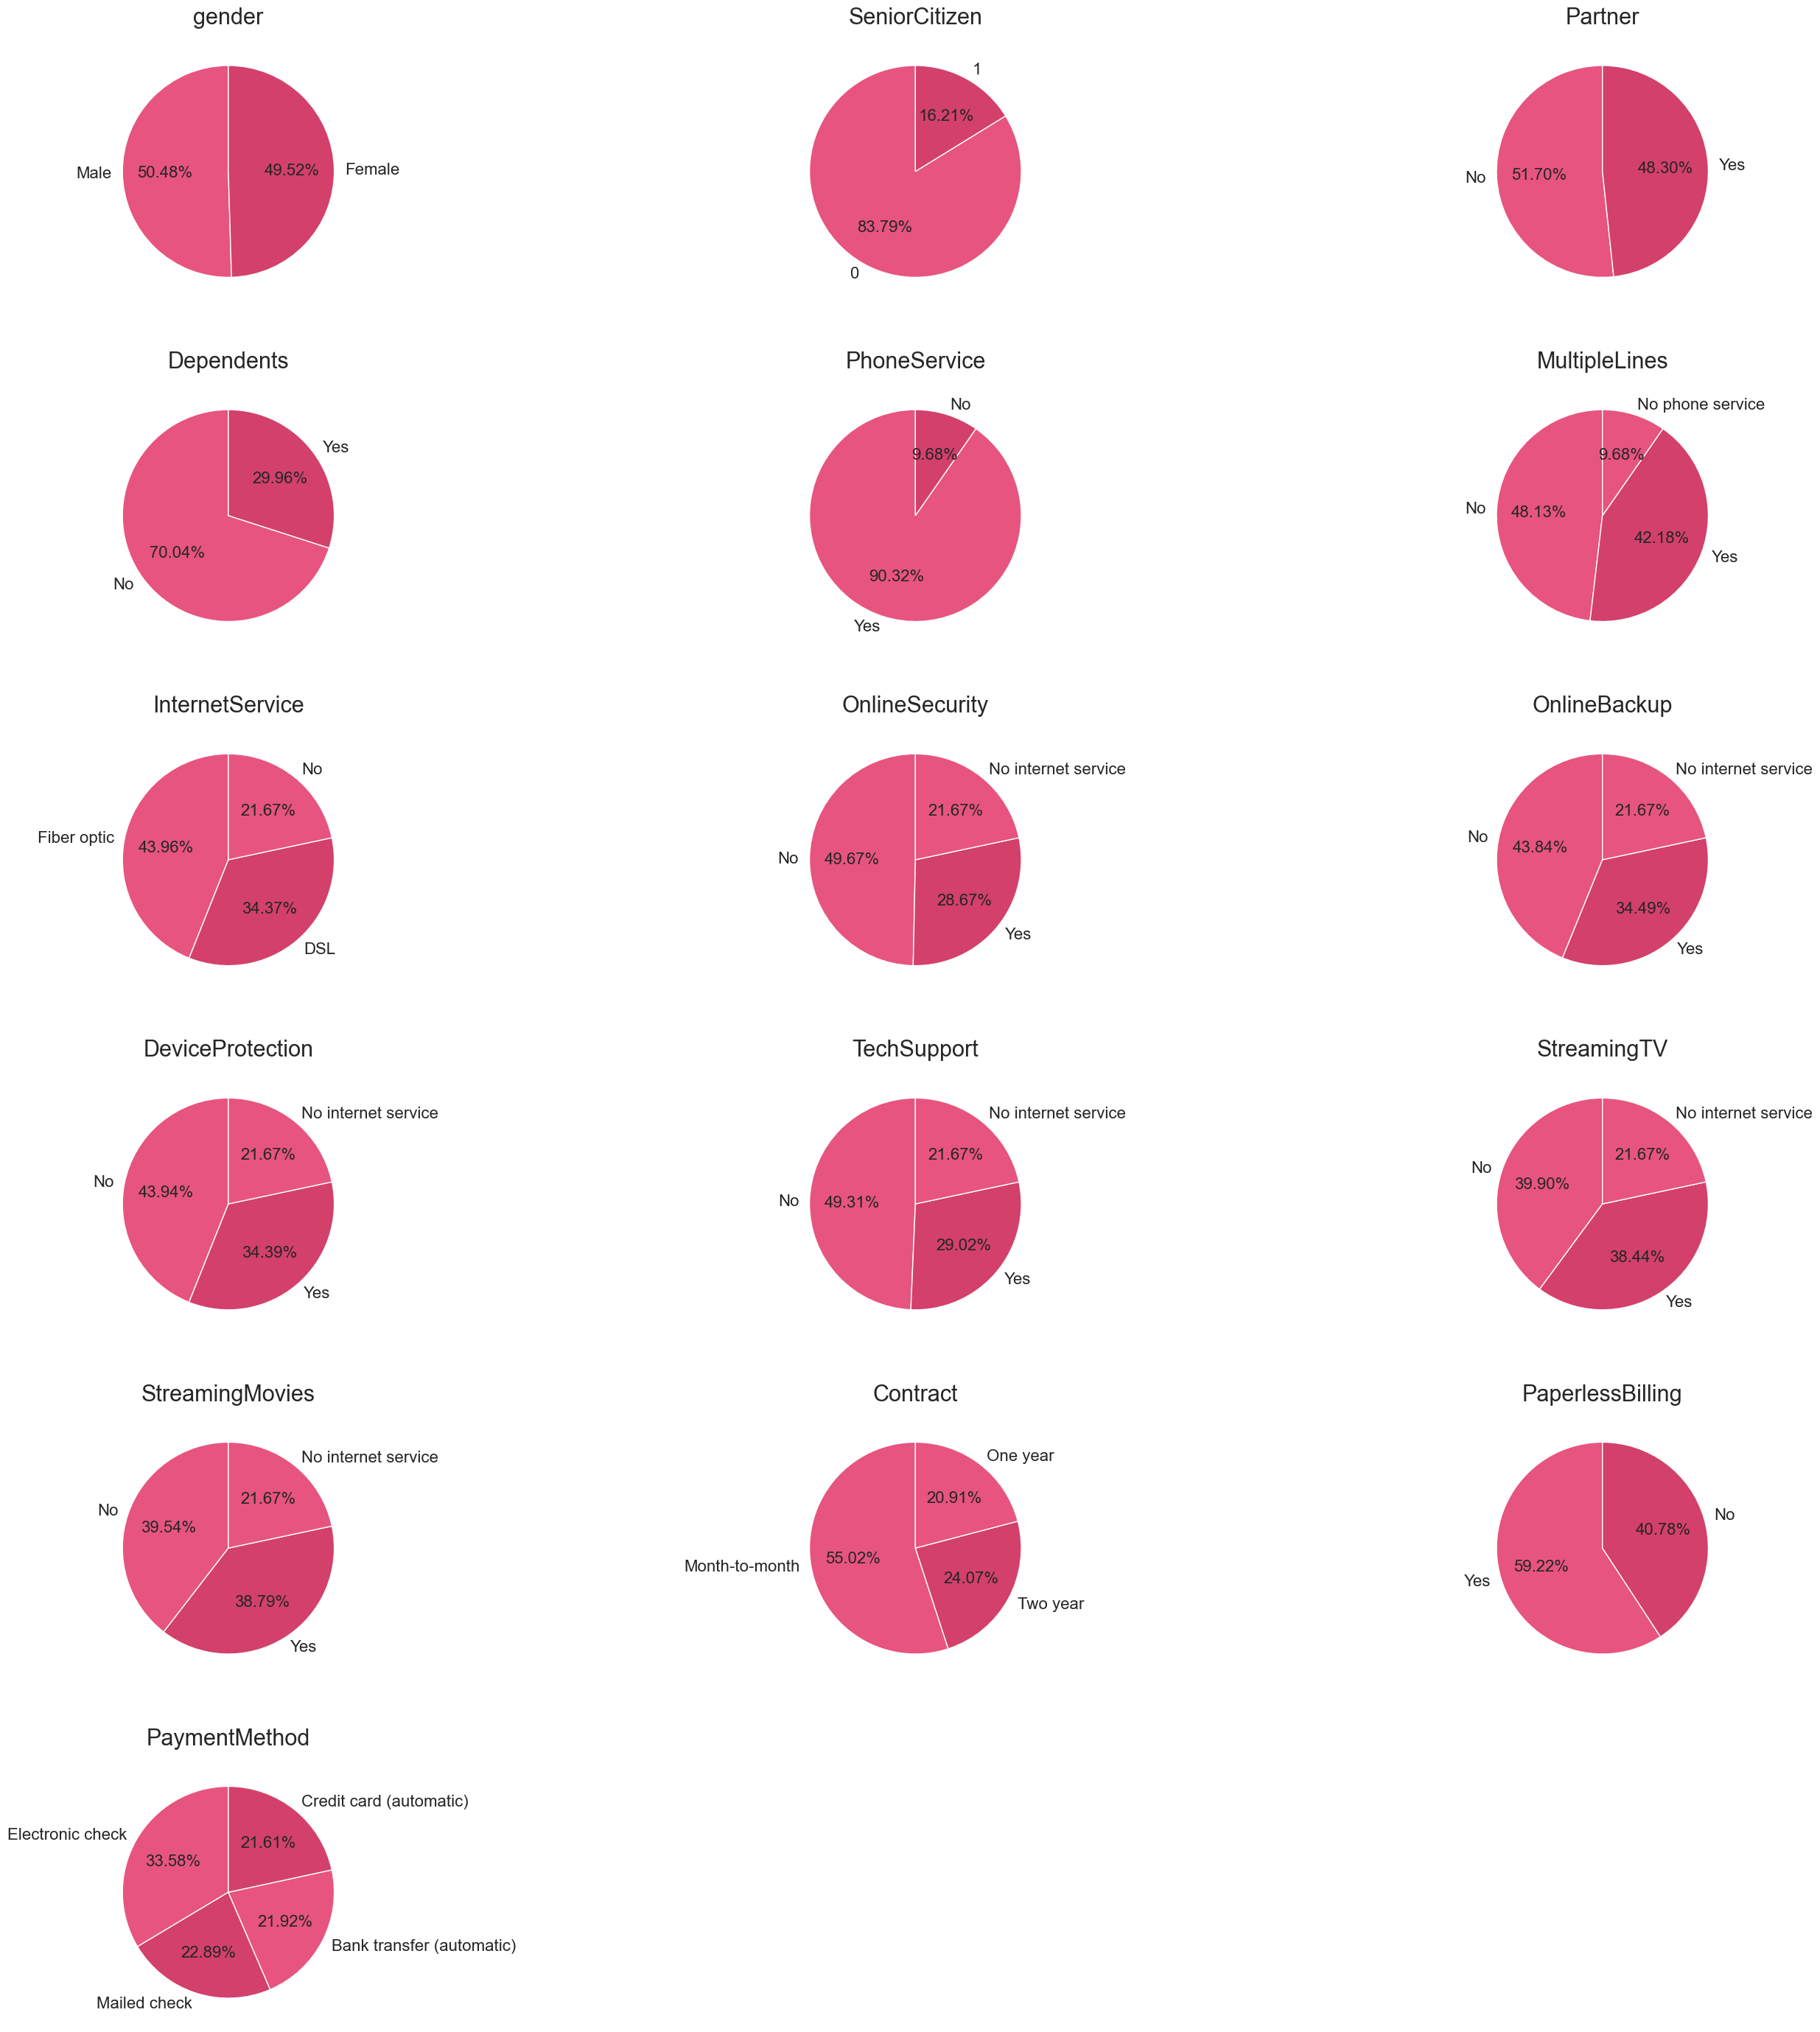

In [169]:
cat_cols = [ 
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling' , 'PaymentMethod'
]

plt.figure(figsize=(35, 35))

for i, col in enumerate(cat_cols):
    plt.subplot(6, 3, i + 1)
    value_counts = df[col].value_counts(normalize=True)
    
    ax = plt.pie(value_counts, labels=value_counts.index, autopct='%1.2f%%',
                  colors=['#E75480', '#D3406C'], startangle=90, textprops={'fontsize': 16} )
    
    plt.title(col, fontsize=22, pad=15)

plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.show()

# Categorical Variables Visualization: Bivariate Analysis.

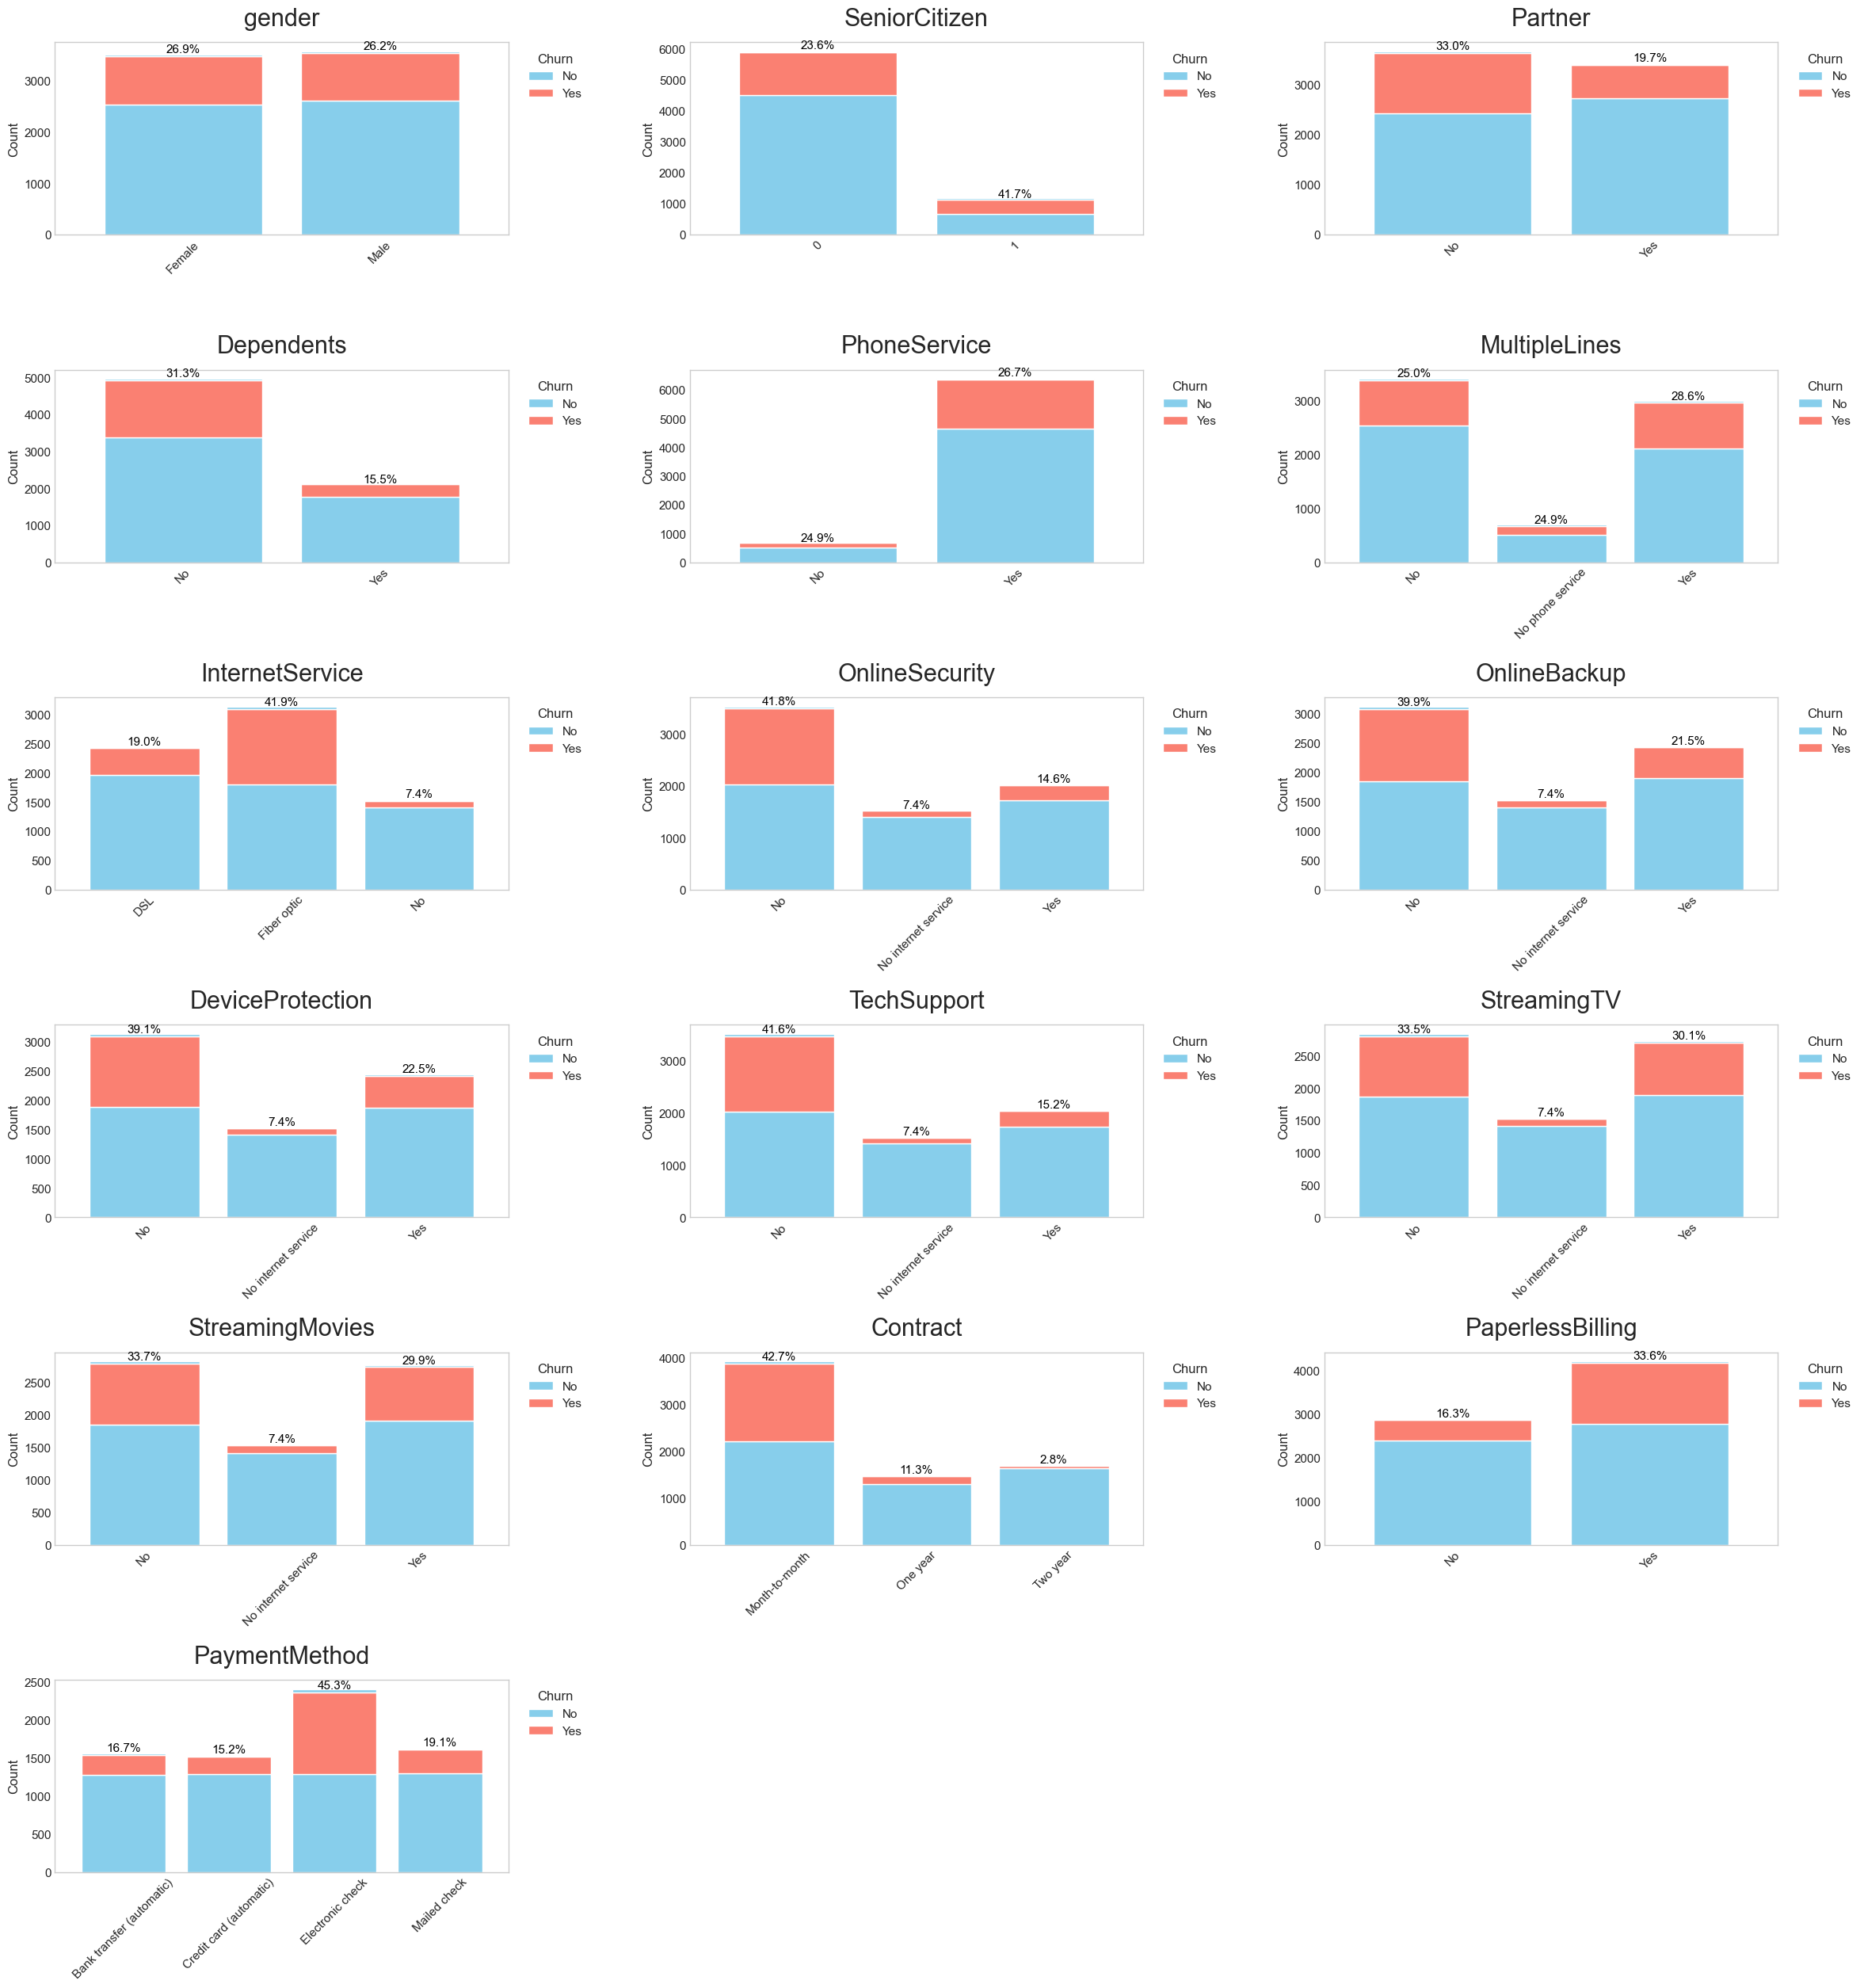

In [170]:
plt.figure(figsize=(30, 30))

for i, col in enumerate(cat_cols):
    plt.subplot(6, 3, i + 1)
    
    counts = df.groupby([col, 'Churn']).size().reset_index(name='count')
    pivot_counts = counts.pivot(index=col, columns='Churn', values='count').fillna(0)
    churn_col = [c for c in pivot_counts.columns if str(c).lower() in ['yes', '1', 'true']][0]
    pivot_counts['Churn %'] = (pivot_counts[churn_col] / pivot_counts.sum(axis=1) * 100).round(1)

    
    bars = pivot_counts.plot(kind='bar', stacked=True, ax=plt.gca(),
                             color=['skyblue', 'salmon'], width=0.8)
    
    plt.grid(False)
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.title(col, fontsize=22, pad=15)
    plt.xlabel("")
    
 
    for idx, total in enumerate(pivot_counts['Churn %']):
        y = pivot_counts.drop(columns='Churn %').iloc[idx].sum()
        plt.text(idx, y + max(y * 0.02, 50), f"{total:.1f}%", ha='center', fontsize=11, color='black')

    plt.legend(title='Churn', labels=list(pivot_counts.columns[:-1]),
               bbox_to_anchor=(1.02, 1), loc='upper left')

plt.subplots_adjust(right=0.85, hspace=0.7, wspace=0.4)
plt.show()

# Categorical Features Relationships. 

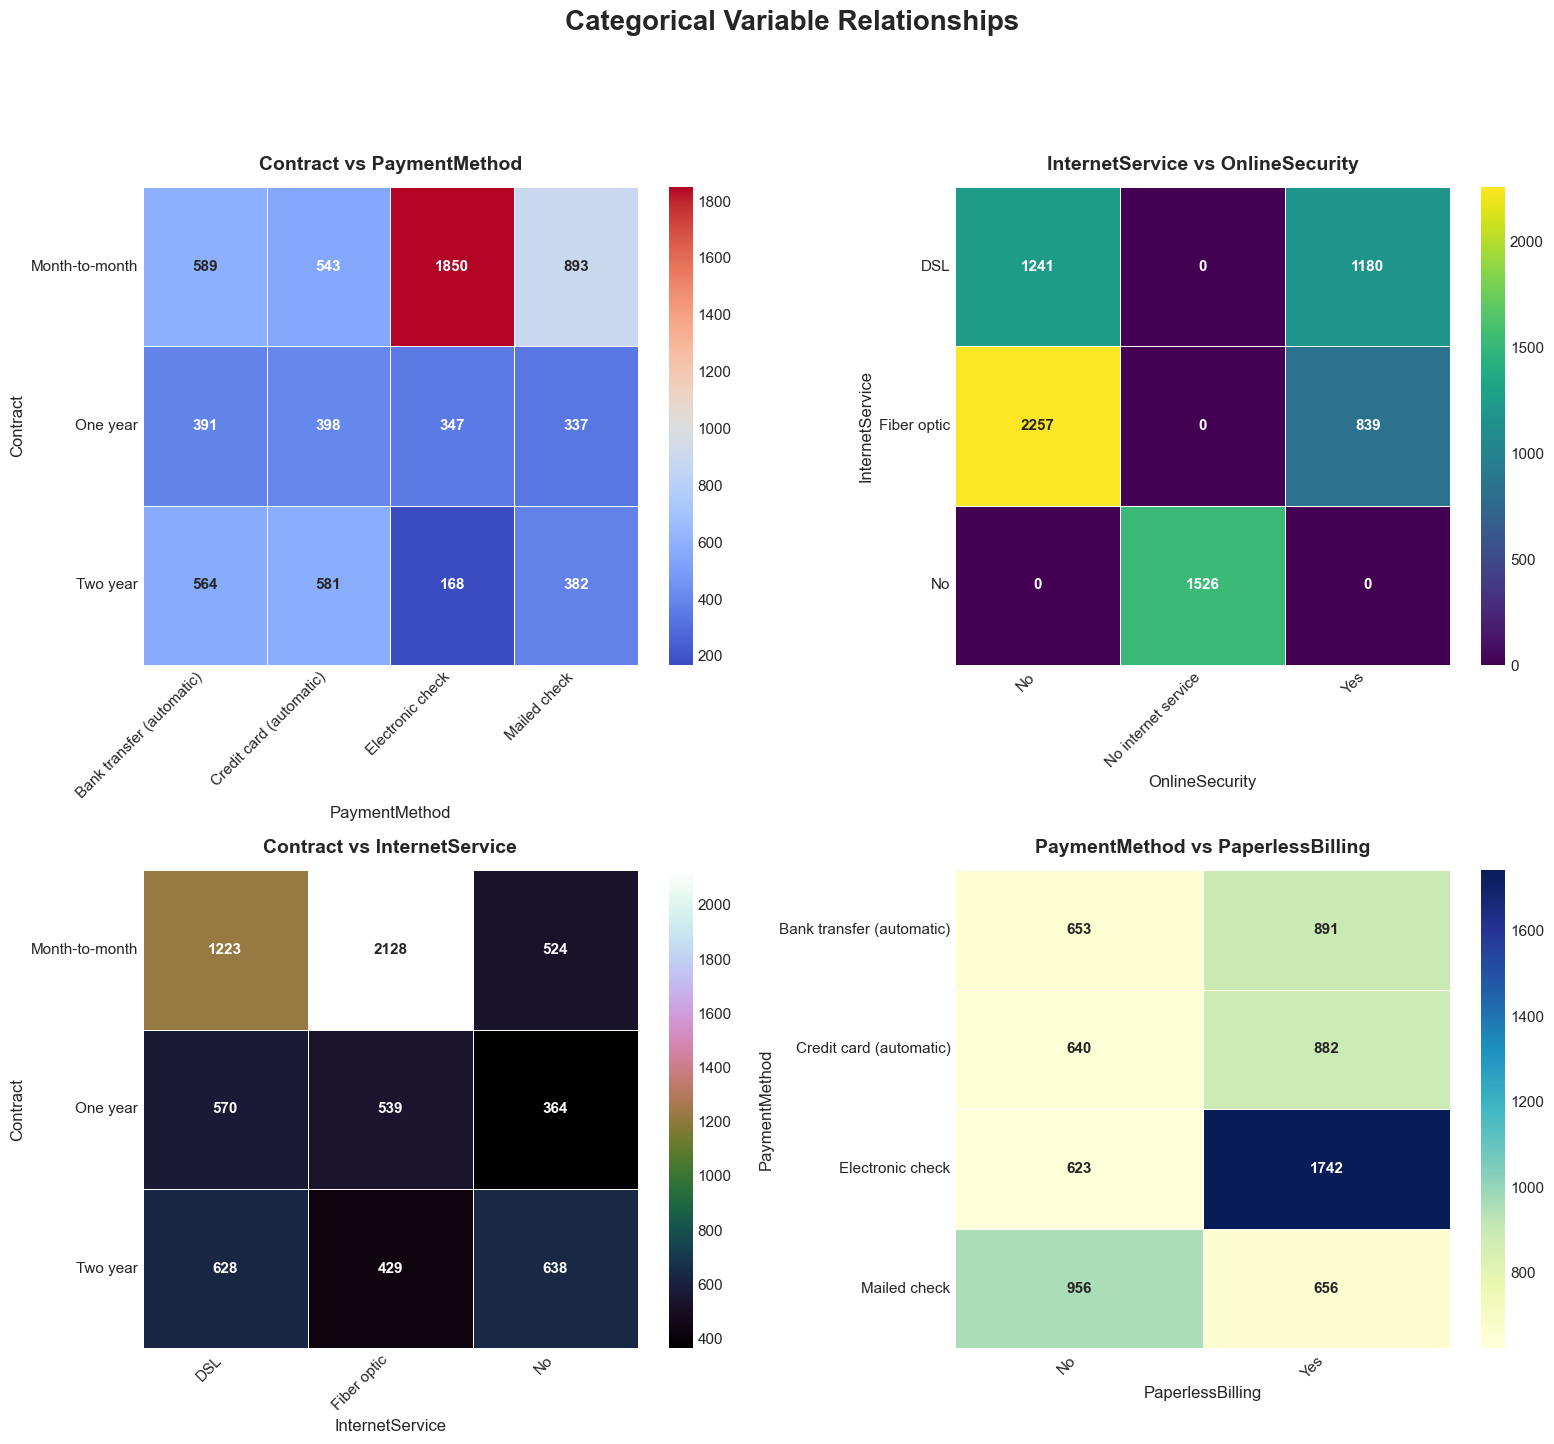

In [171]:
categorical_pairs = [
    ('Contract', 'PaymentMethod'),
    ('InternetService', 'OnlineSecurity'),
    ('Contract', 'InternetService'),
    ('PaymentMethod', 'PaperlessBilling')
]

colormaps = ['coolwarm', 'viridis', 'cubehelix', 'YlGnBu']

plt.style.use('seaborn-v0_8-whitegrid') 
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Categorical Variable Relationships', fontsize=20, fontweight='bold', y=1.03)
axes = axes.flatten()

for idx, (var1, var2) in enumerate(categorical_pairs):
    ax = axes[idx]
    cross_tab = pd.crosstab(df[var1], df[var2])
    
    sns.heatmap(
        cross_tab,
        annot=True,
        
        fmt='d',  
        cmap=colormaps[idx],
        linewidths=0.5,
        linecolor='white',
        annot_kws={'size': 11, 'weight': 'bold'},
        cbar=True,  
        ax=ax
    )

    ax.set_title(f'{var1} vs {var2}', fontsize=14, fontweight='semibold', pad=12)
    ax.set_xlabel(var2, fontsize=12)
    ax.set_ylabel(var1, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# One-hot encoding

In [172]:
df_encoded = df.copy()  
df_encoded['SeniorCitizen'] = df_encoded['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

cols_to_encode = [ 'SeniorCitizen', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines',
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'InternetService', 'Contract', 'PaymentMethod'
]
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_encode, drop_first=True)
df_encoded['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [173]:
df_encoded.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,...,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
1,34,56.95,1889.50,0,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
2,2,53.85,108.15,1,False,False,True,False,True,False,...,False,True,True,False,False,False,False,False,False,True
3,45,42.30,1840.75,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,True,False
5,8,99.65,820.50,1,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,True,False
6,22,89.10,1949.40,0,False,False,False,False,True,False,...,True,True,True,True,False,False,False,True,False,False
7,10,29.75,301.90,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
8,28,104.80,3046.05,1,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,True,False
9,62,56.15,3487.95,0,False,False,True,False,True,False,...,True,True,False,False,False,True,False,False,False,False


In [174]:
df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'SeniorCitizen_Yes', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

# Exploratory Clustering.

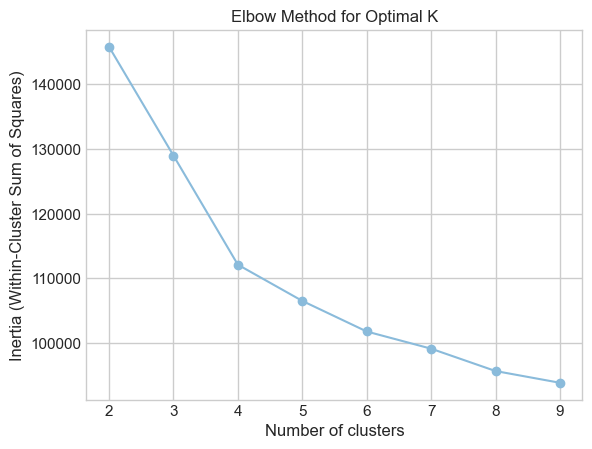

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df_k= df_encoded.copy()
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_k.drop('Churn', axis=1))




inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [176]:
!pip install scikit-learn
from sklearn.metrics import silhouette_score


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [177]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_k['Cluster'] = kmeans.fit_predict(X_scaled)


silhouette_avg = silhouette_score(X_scaled, df_k['Cluster'])
print("Silhouette Score:", round(silhouette_avg, 3))

Silhouette Score: 0.289


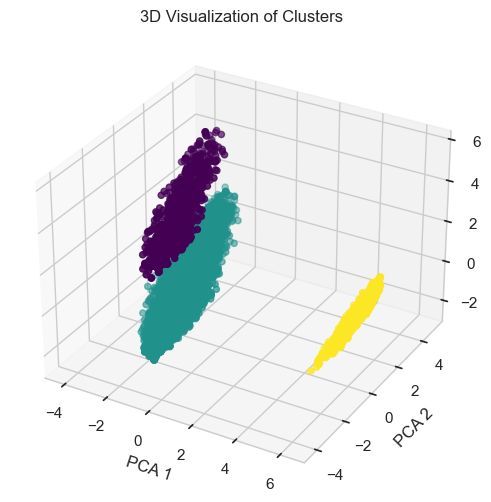

In [178]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c=df_k['Cluster'], cmap='viridis')
ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()

In [179]:
cluster_summary = df_k.groupby('Cluster').mean().round(2)
import pandas as pd

transposed_summary = cluster_summary.T

styled_transposed = transposed_summary.style \
    .set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_caption('Transposed Cluster Summary Statistics') \
    .background_gradient(cmap='viridis') \
    .highlight_max(axis=0, color='lightgreen') \
    .highlight_min(axis=0, color='salmon')

styled_transposed

Cluster,0,1,2
tenure,31.740000,33.040000,30.550000
MonthlyCharges,42.030000,81.760000,21.080000
TotalCharges,1496.030000,2900.670000,662.600000
Churn,0.250000,0.330000,0.070000
SeniorCitizen_Yes,0.150000,0.200000,0.030000
OnlineSecurity_No internet service,0.000000,0.000000,1.000000
OnlineSecurity_Yes,0.410000,0.360000,0.000000
OnlineBackup_No internet service,0.000000,0.000000,1.000000
OnlineBackup_Yes,0.420000,0.440000,0.000000
DeviceProtection_No internet service,0.000000,0.000000,1.000000


# Solving Multicollinearity: Checking VIF. 

In [184]:
!pip install statsmodels

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [182]:
Z = df_encoded.drop(columns=['Churn', 'TotalCharges'])

scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

vif_data = pd.DataFrame()
vif_data["Feature"] = Z.columns
vif_data["VIF"] = [variance_inflation_factor(Z_scaled, i) for i in range(Z_scaled.shape[1])]

vif_data = vif_data.sort_values(by="VIF", ascending=False)

styled_vif_data = vif_data.style \
    .set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Variance Inflation Factor (VIF) for Features") \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #ddd'), ('padding', '8px')]
    }]) \
    .highlight_max(color='lightgreen', axis=0) \
    .highlight_min(color='salmon', axis=0)

styled_vif_data

,Feature,VIF
3,OnlineSecurity_No internet service,inf
9,TechSupport_No internet service,inf
11,StreamingTV_No internet service,inf
7,DeviceProtection_No internet service,inf
5,OnlineBackup_No internet service,inf
23,InternetService_No,inf
20,PhoneService_Yes,inf
15,MultipleLines_No phone service,inf
13,StreamingMovies_No internet service,inf
1,MonthlyCharges,859.072914


In [65]:
cols_to_drop = [ col for col in df_encoded . columns if 'No internet service' in col or 'No phone service' in col ]
cols_to_drop . append ( 'TotalCharges' )
cols_to_drop.append('MonthlyCharges')
cols_to_drop . append ( 'Churn' )


Z = df_encoded . drop ( columns = cols_to_drop )

scaler = StandardScaler()
Z_scaled = scaler.fit_transform(Z)

vif_data = pd.DataFrame()
vif_data["Feature"] = Z.columns
vif_data["VIF"] = [variance_inflation_factor(Z_scaled, i) for i in range(Z_scaled.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                                  Feature       VIF
0                                  tenure  2.785135
15                     InternetService_No  2.698749
17                      Contract_Two year  2.613895
14            InternetService_Fiber optic  2.006234
19         PaymentMethod_Electronic check  1.973799
20             PaymentMethod_Mailed check  1.841066
7                     StreamingMovies_Yes  1.633899
6                         StreamingTV_Yes  1.626085
16                      Contract_One year  1.621942
18  PaymentMethod_Credit card (automatic)  1.560358
5                         TechSupport_Yes  1.482149
4                    DeviceProtection_Yes  1.481035
10                            Partner_Yes  1.462121
8                       MultipleLines_Yes  1.421524
2                      OnlineSecurity_Yes  1.415899
11                         Dependents_Yes  1.383696
3                        OnlineBackup_Yes  1.380415
12                       PhoneService_Yes  1.354637
13          

# Linear Models: Logistic Regression and Support Vector Machine Algorithms.

In [183]:
pip install shap imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [185]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [186]:
cols_to_drop = [col for col in df_encoded.columns if 'No internet service' in col or 'No phone service' in col]
cols_to_drop += ['TotalCharges', 'MonthlyCharges']  

df_cleaned = df_encoded.drop(columns=cols_to_drop)

X = df_cleaned.drop(columns=['Churn'])
y = df_cleaned['Churn']

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_resampled_train, y_resampled_train = smote.fit_resample(X_train, y_train)



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled_train)
X_test_scaled = scaler.transform(X_test)

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression

In [190]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

param_grid_lr = {
    'penalty': ['l1'],  #  l1 &  liblinear performed the best, tested l2 & newton-cg/lbfgs
    'C': [0.01, 0.05], # tested the following as well, but this did not improve the performance 0.1, 0.5, 1, 5
    'solver': ['liblinear'],  
    'class_weight': ['balanced', None] 
}

lr = LogisticRegression(random_state=42)

grid_search_lr = GridSearchCV(estimator=lr,
                              param_grid=param_grid_lr,
                              cv=skf,
                              scoring='f1',
                              n_jobs=-1,
                              verbose=2)

grid_search_lr.fit(X_train_scaled, y_resampled_train)

best_lr = grid_search_lr.best_estimator_

y_pred_lr = best_lr.predict(X_test_scaled)
y_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

print("Best Parameters:", grid_search_lr.best_params_)
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Parameters: {'C': 0.05, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409

ROC-AUC Score: 0.8221460125552198


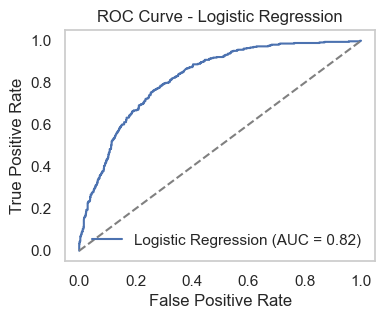

In [203]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr) 

plt.figure(figsize=(4, 3))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_lr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(alpha=0.0)
plt.show()

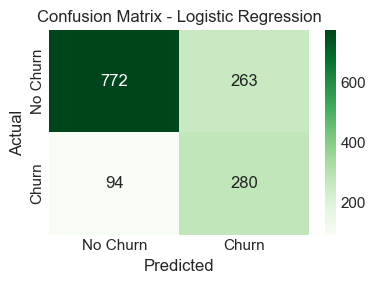

In [192]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

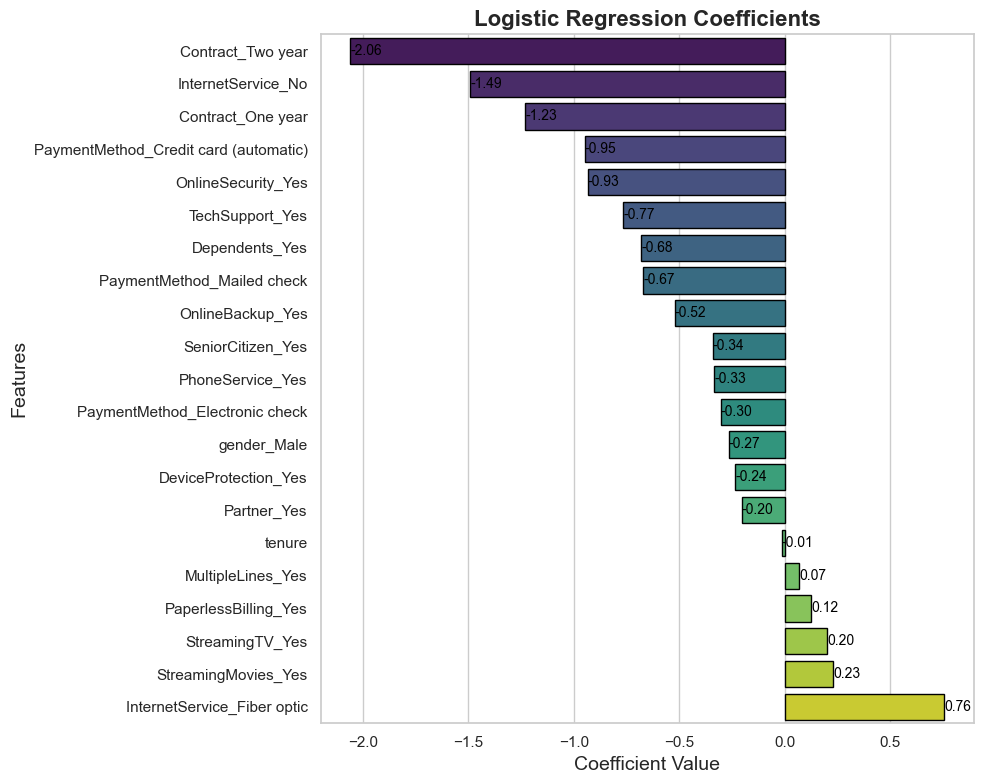

In [194]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_resampled_train, y_resampled_train)

coefs = pd.Series(log_reg.coef_[0], index=X.columns).sort_values()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))

barplot = sns.barplot(x=coefs.values, y=coefs.index, palette='viridis', edgecolor='black')

plt.title("Logistic Regression Coefficients", fontsize=16, fontweight='bold')
plt.xlabel("Coefficient Value", fontsize=14)
plt.ylabel("Features", fontsize=14)

for index, value in enumerate(coefs.values):
    barplot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.tight_layout()

plt.show()

# SVM (Support Vector Machine). 

In [197]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm = LinearSVC(class_weight='balanced', random_state=42, max_iter=5000)

param_grid_svm = {
    'estimator__C': [0.01, 0.1, 1, 10] 
}

calibrated_svm = CalibratedClassifierCV(
    estimator=svm, 
    cv=5,  
    method='sigmoid'  
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_svm = GridSearchCV(
    estimator=calibrated_svm,
    param_grid=param_grid_svm,
    scoring='f1',  
    cv=skf,
    n_jobs=-1
)

grid_search_svm.fit(X_train_scaled, y_resampled_train)
best_svm = grid_search_svm.best_estimator_

print("Best parameters:", grid_search_svm.best_params_)

y_pred_svm = best_svm.predict(X_test_scaled)
y_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

print("\nClassification Report (Calibrated Linear SVM):")
print(classification_report(y_test, y_pred_svm, digits=3))

roc_auc = roc_auc_score(y_test, y_proba_svm)
print("ROC-AUC Score:", round(roc_auc, 3))

Best parameters: {'estimator__C': 0.1}

Classification Report (Calibrated Linear SVM):
              precision    recall  f1-score   support

           0      0.887     0.754     0.815      1035
           1      0.519     0.735     0.608       374

    accuracy                          0.749      1409
   macro avg      0.703     0.744     0.712      1409
weighted avg      0.790     0.749     0.760      1409

ROC-AUC Score: 0.82


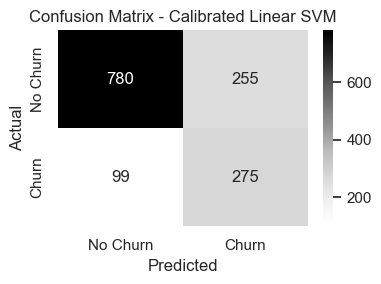

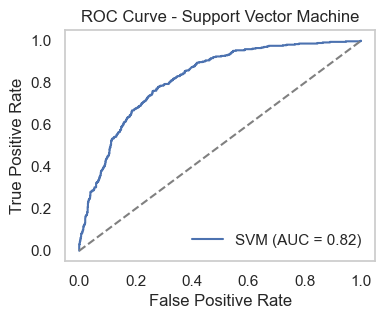

In [204]:
y_pred_svm = best_svm.predict(X_test_scaled)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greys',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Calibrated Linear SVM")
plt.tight_layout()


fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

# Plotting the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_svm)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Support Vector Machine")
plt.legend()
plt.grid(alpha=0.0)
plt.show()

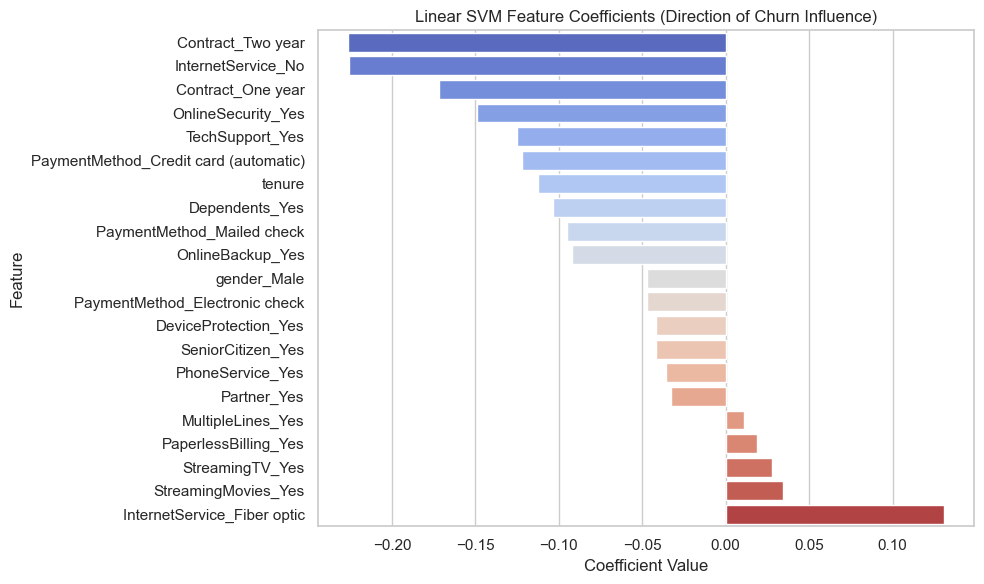

In [198]:
coef_list = []
for clf in best_svm.calibrated_classifiers_:
    if hasattr(clf, "estimator"):
        coef_list.append(clf.estimator.coef_.ravel())
    elif hasattr(clf, "base_estimator_"):
        coef_list.append(clf.base_estimator_.coef_.ravel())

coefs = np.mean(coef_list, axis=0)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefs,
    'Absolute_Coefficient': np.abs(coefs)
}).sort_values('Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Linear SVM Feature Coefficients (Direction of Churn Influence)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Non-linear models: Tree-based and ensemble models. 

In [205]:
Xb =  df_encoded.drop(columns=['Churn'])
yb =  df_encoded['Churn']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    Xb, yb, test_size=0.2, random_state=42, stratify=yb
)

smote = SMOTE(random_state=42)
Xb_resampled_train, yb_resampled_train = smote.fit_resample(Xb_train, yb_train)

In [206]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Decision Tree Algorithm.

In [207]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

param_grid_dt = {
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 5], # 20
    'min_samples_leaf': [1, 2], # 5, 10
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}

dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(estimator=dt,
                              param_grid=param_grid_dt,
                              cv=skf,
                              scoring='f1',  # recall gave better overall outcome
                              n_jobs=-1,
                              verbose=2)

grid_search_dt.fit(Xb_resampled_train, yb_resampled_train)

best_dt = grid_search_dt.best_estimator_

yb_pred_dt = best_dt.predict(Xb_test)
yb_proba_dt = best_dt.predict_proba(Xb_test)[:, 1]

print("Best Parameters:", grid_search_dt.best_params_)
print(classification_report(yb_test, yb_pred_dt))
print("ROC-AUC Score:", roc_auc_score(yb_test, yb_proba_dt))


Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.53      0.66      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.76      1409

ROC-AUC Score: 0.806732284481645


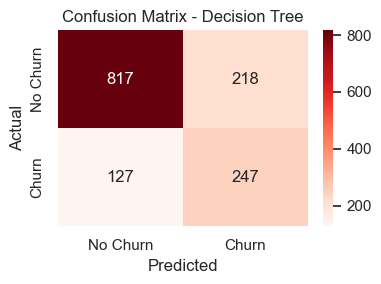

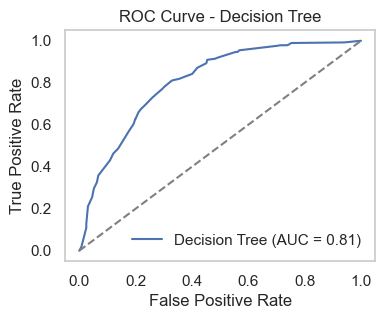

In [208]:
conf_matrix_dt = confusion_matrix(yb_test, yb_pred_dt)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Reds',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()

fpr_dt, tpr_dt, _ = roc_curve(yb_test, yb_proba_dt)

plt.figure(figsize=(4, 3))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(yb_test, yb_proba_dt)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(alpha=0.0)
plt.show()

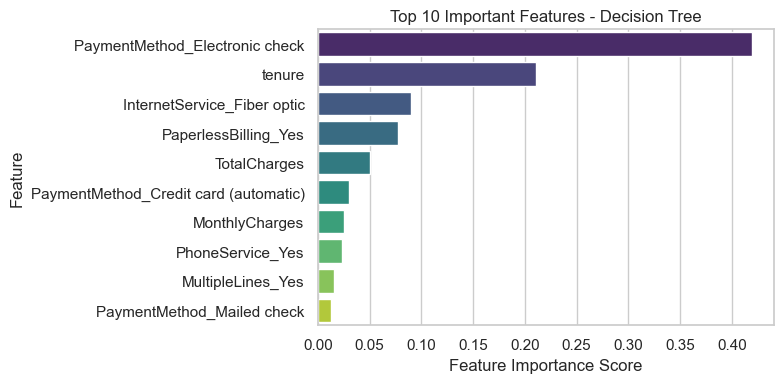

In [209]:
feature_importances = pd.Series(best_dt.feature_importances_, index=Xb_resampled_train.columns)

top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title("Top 10 Important Features - Decision Tree")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [210]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Algorithm.

In [211]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
    # Slight improvement after tuning
    # Changing these and even adding parameters like 'bootstrap' did not change the results, so the simpler configuration was used.
}

rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=skf,
                              scoring='recall',
                              n_jobs=-1,
                              verbose=2)

grid_search_rf.fit(Xb_resampled_train, yb_resampled_train)

best_rf = grid_search_rf.best_estimator_
    
yb_pred_rf = best_rf.predict(Xb_test)
yb_proba_rf = best_rf.predict_proba(Xb_test)[:, 1]

print("Best Parameters:", grid_search_rf.best_params_)
print(classification_report(yb_test, yb_pred_rf))
print("ROC-AUC Score:", roc_auc_score(yb_test, yb_proba_rf))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409

ROC-AUC Score: 0.8377999948332429


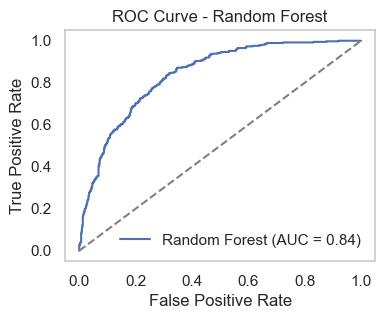

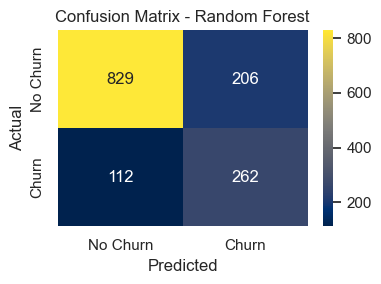

In [212]:
fpr_rf, tpr_rf, _ = roc_curve(yb_test, yb_proba_rf)

plt.figure(figsize=(4, 3))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(yb_test, yb_proba_rf)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(alpha=0.0)

conf_matrix_rf = confusion_matrix(yb_test, yb_pred_rf)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='cividis',
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

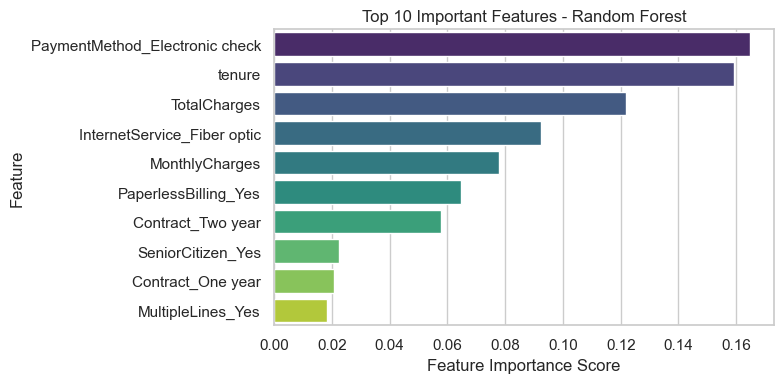

In [213]:
feature_importances_rf = pd.Series(best_rf.feature_importances_, index=Xb_resampled_train.columns)

top_features_rf = feature_importances_rf.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_features_rf, y=top_features_rf.index, palette='viridis')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [215]:
import shap

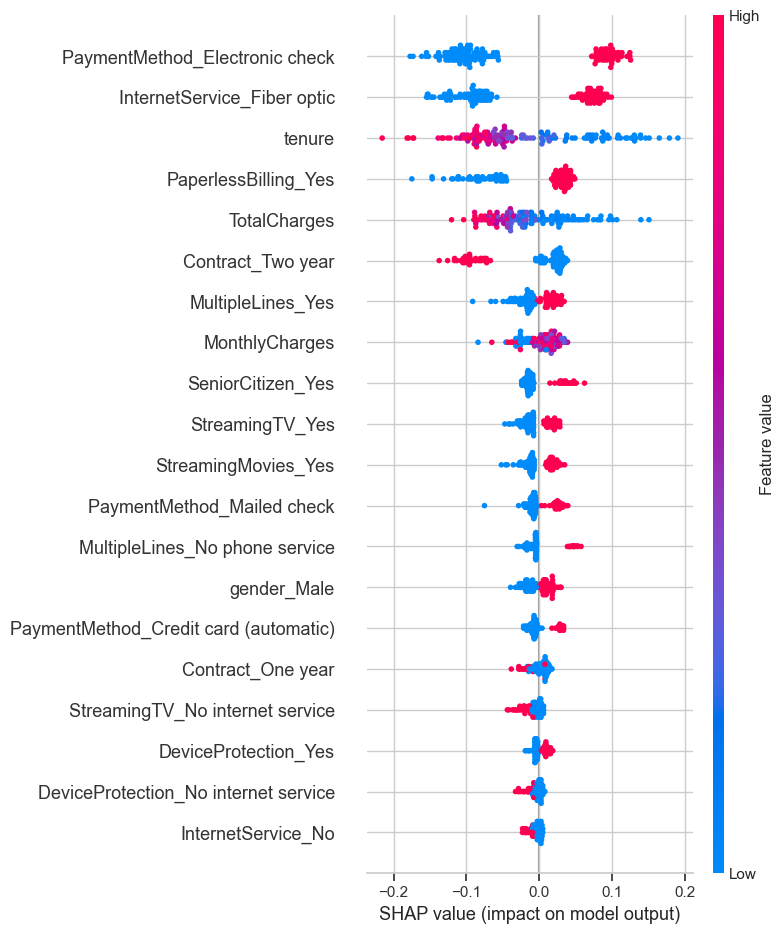

In [216]:
sample_X = Xb_test.sample(frac=0.1, random_state=42)  

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(sample_X)

shap.summary_plot(shap_values[:, :, 1], sample_X, show=True)

# Extra Tress Algorithm.

In [217]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [100, 150], 
    'max_depth': [None, 5], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [ 'sqrt', 'log2'],
    'class_weight': ['balanced']
}

et = ExtraTreesClassifier(random_state=42, n_jobs=-1)

grid_search_et = GridSearchCV(estimator=et, 
                               param_grid=param_grid, 
                               scoring='recall', 
                               cv=5, 
                               verbose=2, 
                               n_jobs=-1)

grid_search_et.fit(Xb_resampled_train, yb_resampled_train)

best_et = grid_search_et.best_estimator_

yb_pred_et = best_et.predict(Xb_test)
yb_proba_et = best_et.predict_proba(Xb_test)[:, 1] 

print(classification_report(yb_test, yb_pred_et))
print("ROC-AUC:", roc_auc_score(yb_test, yb_proba_et))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.66      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

ROC-AUC: 0.8258789945490713


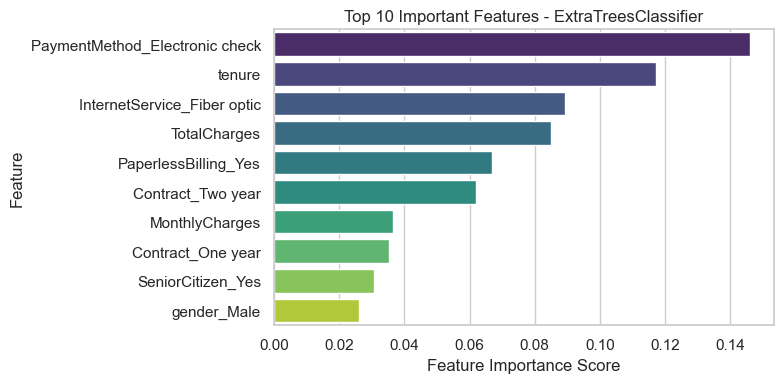

In [218]:
feature_importances_et = pd.Series(best_et.feature_importances_, index=Xb_resampled_train.columns)

top_features_et = feature_importances_et.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_features_et, y=top_features_et.index, palette='viridis')
plt.title("Top 10 Important Features - ExtraTreesClassifier")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

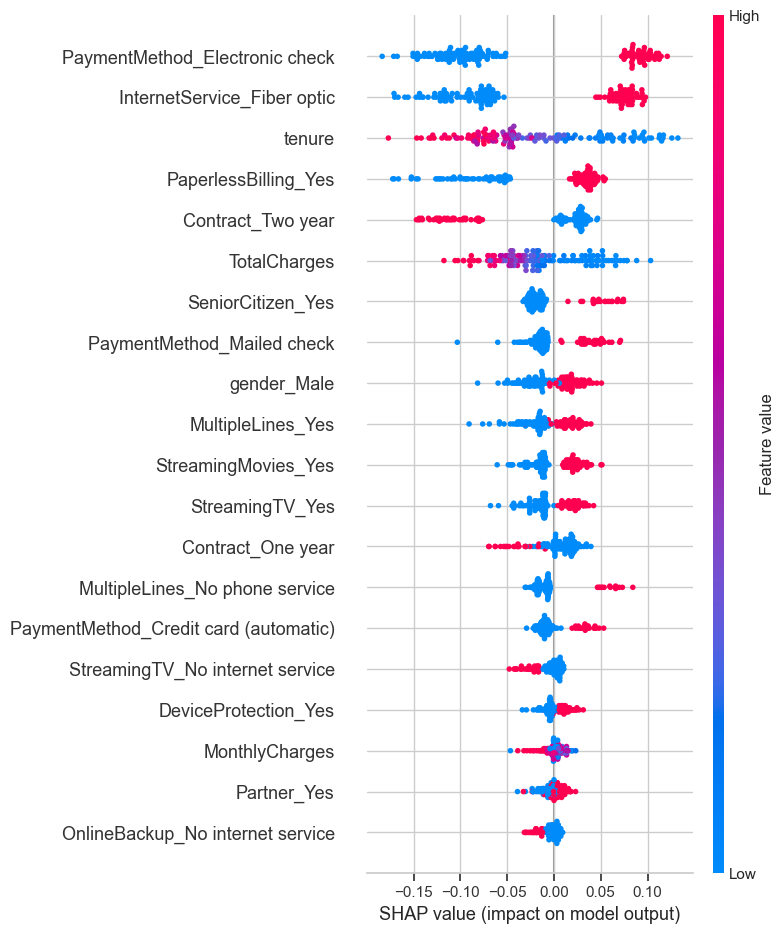

In [220]:
sample_X = Xb_test.sample(frac=0.1, random_state=42)  

explainer = shap.TreeExplainer(best_et)
shap_values = explainer.shap_values(sample_X)

shap.summary_plot(shap_values[:, :, 1], sample_X, show=True)

# XGBoost Algorithm.

In [221]:
from xgboost import XGBClassifier

In [222]:
from xgboost import XGBClassifier


best_xgb = XGBClassifier(
    n_estimators=200,          
    learning_rate=0.03,        
    max_depth=8,               
    min_child_weight=3,        
    gamma=0.3,                 
    subsample=0.95,            
    colsample_bytree=0.95,     
    scale_pos_weight=2,        
    random_state=42,           
    eval_metric='logloss',     
    use_label_encoder=False    
)






best_xgb.fit(Xb_resampled_train, yb_resampled_train)

yb_pred_xgb = best_xgb.predict(Xb_test)
yb_proba_xgb = best_xgb.predict_proba(Xb_test)[:, 1]



print(classification_report(yb_test, yb_pred_xgb))
print("ROC-AUC:", roc_auc_score(yb_test, yb_proba_xgb))


              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1035
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409

ROC-AUC: 0.8323800666511664


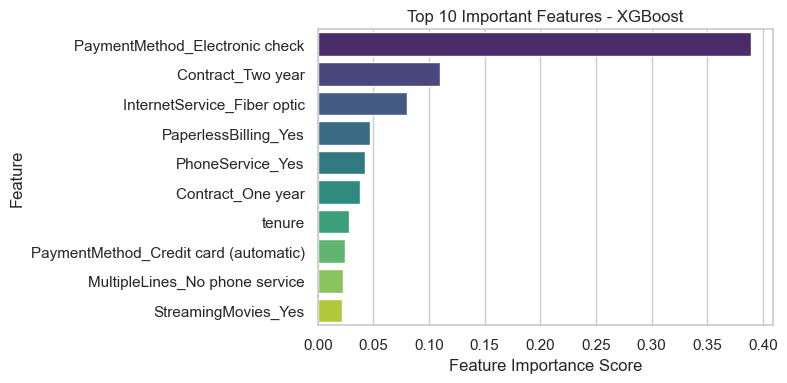

In [223]:
feature_importances_xgb = pd.Series(best_xgb.feature_importances_, index=Xb_resampled_train.columns)

top_features_xgb = feature_importances_xgb.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_features_xgb, y=top_features_xgb.index, palette='viridis')
plt.title("Top 10 Important Features - XGBoost")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

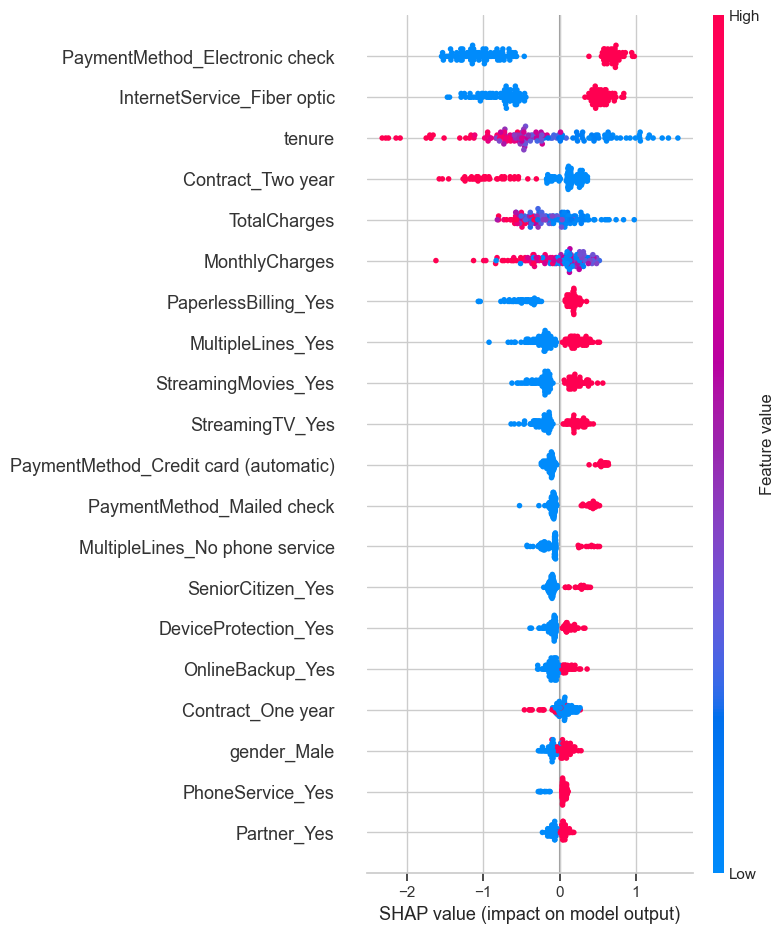

In [224]:
explainer = shap.TreeExplainer(best_xgb)

sample_X = Xb_test.sample(frac=0.1, random_state=42)

shap_values = explainer.shap_values(sample_X)

shap.summary_plot(shap_values, sample_X, show=True)

# Average Feature Importance Across Ensemble Models. 

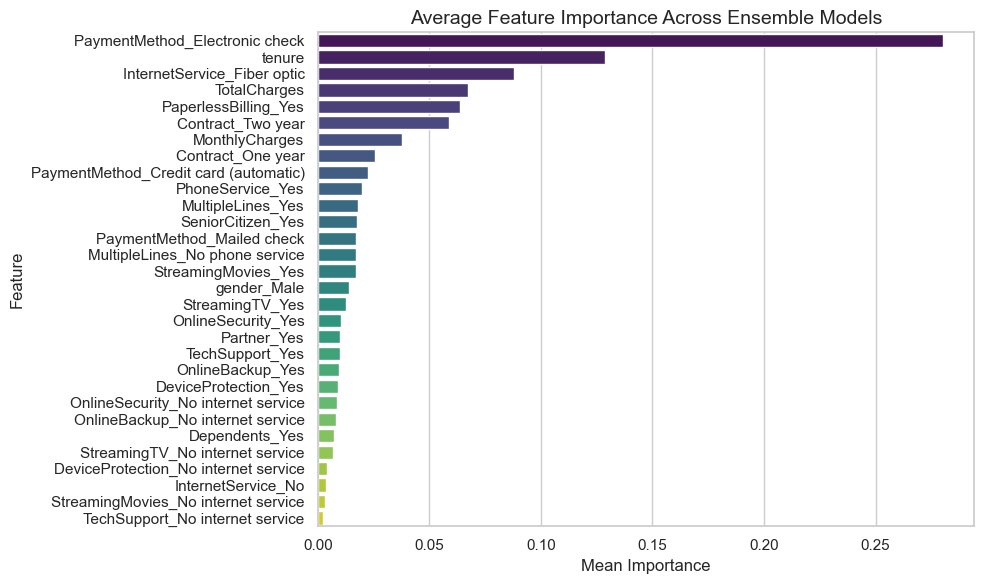

In [225]:
fi_xgb = best_xgb.feature_importances_
fi_dt = best_dt.feature_importances_
fi_rf = best_rf.feature_importances_
fi_et= best_et.feature_importances_
        
feature_importances = pd.DataFrame({
    'Feature': Xb_resampled_train.columns,
    'XGBoost': fi_xgb,
    'Decision Tree': fi_dt,
    'Random Forest': fi_rf,
    'Extra Trees': fi_et
})
feature_importances.head()

feature_importances['Mean_Importance'] = feature_importances[['XGBoost', 'Decision Tree', 'Random Forest', 'Extra Trees']].mean(axis=1)
feature_importances = feature_importances.sort_values('Mean_Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Mean_Importance', y='Feature', data=feature_importances,
            palette='viridis')
plt.title('Average Feature Importance Across Ensemble Models', fontsize=14)
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Validating Churn Patterns through Customer Segmentation

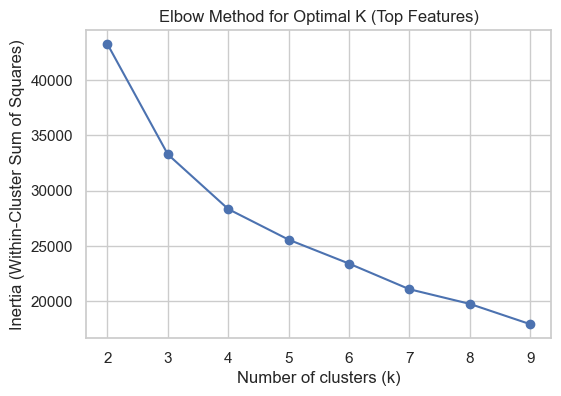

In [226]:
top_features = [
    'PaymentMethod_Electronic check',
    'tenure',
    'InternetService_Fiber optic',
    'Contract_Two year',
    'TotalCharges',
    'PaperlessBilling_Yes',
    'MonthlyCharges',
    'PaymentMethod_Credit card (automatic)'
]

df_top = df_encoded[top_features].copy()

scaler = StandardScaler()
X_top_scaled = scaler.fit_transform(df_top)

inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_top_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K (Top Features)')
plt.show()

In [227]:
kmeans_top = KMeans(n_clusters=4, random_state=42)
df_top['Cluster'] = kmeans_top.fit_predict(X_top_scaled)

silhouette_avg = silhouette_score(X_top_scaled, df_top['Cluster'])
print("Silhouette Score:", round(silhouette_avg, 4))

Silhouette Score: 0.2711


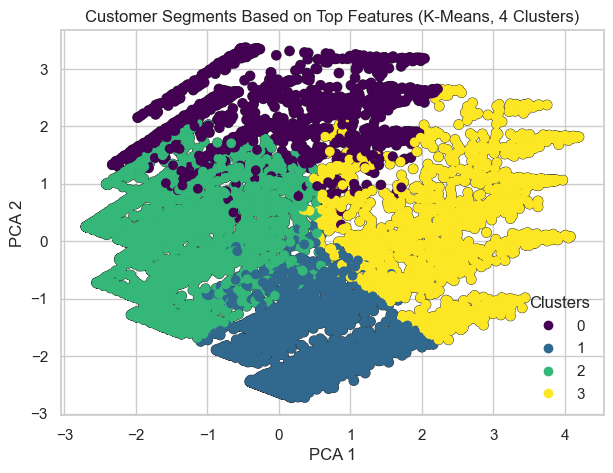

In [228]:
pca = PCA(n_components=2, random_state=42)
reduced_top = pca.fit_transform(X_top_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(
    reduced_top[:, 0],
    reduced_top[:, 1],
    c=df_top['Cluster'],
    cmap='viridis',
    s=45,
    alpha=0.85,
    edgecolor='k'
)
plt.title('Customer Segments Based on Top Features (K-Means, 4 Clusters)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.legend(*plt.scatter(reduced_top[:, 0], reduced_top[:, 1],
                        c=df_top['Cluster'], cmap='viridis').legend_elements(),
           title="Clusters", loc="best")

plt.show()

# Cluster Summary Statistics.

In [229]:
df_top['Churn'] = df_encoded['Churn'].values

cluster_summary_top = df_top.groupby('Cluster').mean().round(2)


transposed_summary = cluster_summary_top.T

styled_transposed = transposed_summary.style \
    .set_table_attributes('style="width: 80%; margin: auto;"') \
    .set_caption('Cluster Summary Statistics') \
    .background_gradient(cmap='viridis') \
    .highlight_max(axis=0, color='lightgreen') \
    .highlight_min(axis=0, color='salmon')

styled_transposed

Cluster,0,1,2,3
PaymentMethod_Electronic check,0.050000,0.680000,0.260000,0.280000
tenure,53.590000,15.350000,19.660000,58.670000
InternetService_Fiber optic,0.000000,0.990000,0.000000,0.900000
Contract_Two year,0.980000,0.000000,0.000000,0.330000
TotalCharges,2538.980000,1357.040000,873.990000,5774.950000
PaperlessBilling_Yes,0.340000,0.790000,0.470000,0.770000
MonthlyCharges,44.630000,85.470000,41.100000,97.920000
PaymentMethod_Credit card (automatic),0.350000,0.090000,0.170000,0.350000
Churn,0.010000,0.570000,0.210000,0.180000


# Final Notes

This notebook wraps up the full modeling and analysis process for the churn prediction project. The results clearly show that customer churn isn’t random; it’s driven by a mix of payment behavior, contract type, and service-related factors.

While the models aren’t perfect, they work well as a screening tool to flag at-risk customers and help telecom companies act before people leave. The goal here wasn’t just high accuracy, but to understand why customers churn and how those insights can be used in real strategies.

Overall, this analysis gives a solid, honest view of how data can actually explain decisions in the telecom world.